# Times Higher Education University Rankings Time Series Analysis

## 1. Importing Libraries and Data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Set path variable

path = r'C:\Users\HP\Documents\CareerFoundry\Data Immersion\Achievement 6\World University Rankings Analysis'

In [3]:
# Import dataset

df_times = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'times_top200.csv'))

In [4]:
# Check to see if it was imported correctly

df_times

,Unnamed: 0,world_rank_Times,university_name,country,teaching_score,international_outlook_score,research_score,citations_score,income_score,overall_score_Times,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,0.25,NaN,2011
1,1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,0.27,0.492537,2011
2,2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,0.33,0.587302,2011
3,3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,0.22,0.724138,2011
4,4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,NaN,94.2,7929.0,8.4,0.27,0.818182,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,1998,196,Newcastle University,United Kingdom,30.9,84.3,27.5,81.5,34.7,49.2,20174.0,15.2,0.29,1.000000,2016
1197,1999,196,"St George’s, University of London",United Kingdom,25.6,69.5,18.1,100.0,37.7,49.2,2958.0,13.4,0.17,1.564103,2016
1198,2000,198,University of Trento,Italy,30.8,55.9,27.4,87.7,47.1,49.1,16841.0,43.2,0.08,1.040816,2016
1199,2001,199,Paris Diderot University – Paris 7,France,30.5,64.9,22.9,91.0,29.0,48.9,27756.0,14.8,0.17,1.702703,2016


## 2. Data Wrangling, Cleaning, and Subsetting

In [5]:
# Removing the 'Unnamed: 0' column

df_times = df_times.drop(columns = ['Unnamed: 0'])

In [6]:
df_times.dtypes

world_rank_Times                 int64
university_name                 object
country                         object
teaching_score                 float64
international_outlook_score    float64
research_score                 float64
citations_score                float64
income_score                   float64
overall_score_Times            float64
num_students                   float64
student_staff_ratio            float64
international_students         float64
female_male_ratio              float64
year                             int64
dtype: object

In [8]:
# Create a subset with only relevant numerical columns, grouped by 'year' and 'country' columns first

df_times_sub1 = df_times.groupby(['year', 'country'], as_index=False)[['world_rank_Times', 
                                                                       'teaching_score',
                                                                       'international_outlook_score',
                                                                       'research_score',
                                                                       'citations_score',
                                                                       'income_score',
                                                                       'num_students',
                                                                       'student_staff_ratio',
                                                                       'international_students',
                                                                       'female_male_ratio']].mean()

In [9]:
df_times_sub1.head()

,year,country,world_rank_Times,teaching_score,international_outlook_score,research_score,citations_score,income_score,num_students,student_staff_ratio,international_students,female_male_ratio
0,2011,Australia,90.571429,49.657143,84.428571,53.342857,71.400000,58.183333,34468.571429,27.471429,0.314286,1.120199
1,2011,Austria,191.000000,42.750000,81.350000,40.250000,52.900000,31.000000,26430.000000,18.700000,0.320000,1.602108
2,2011,Belgium,121.500000,55.250000,27.150000,61.000000,49.000000,97.400000,37334.500000,38.000000,0.135000,1.249747
3,2011,Canada,106.888889,52.422222,69.520000,60.711111,65.522222,38.100000,33927.444444,19.577778,0.193333,1.229909
4,2011,China,105.333333,60.300000,44.140000,49.783333,66.350000,63.600000,37133.833333,12.616667,0.081667,0.764543


In [10]:
df_times_sub1.shape

(158, 12)

In [12]:
# Create a further subset that just includes the year, country, and world ranking columns

df_times_timerank = df_times_sub1[['year', 'country', 'world_rank_Times']]

In [14]:
# Create a subset that only includes universities from the USA

df_times_USA = df_times_timerank.loc[df_times_timerank['country'] == 'United States of America']

df_times_USA

,year,country,world_rank_Times
25,2011,United States of America,71.847222
51,2012,United States of America,78.226667
75,2013,United States of America,86.355263
101,2014,United States of America,87.506494
129,2015,United States of America,87.500000
157,2016,United States of America,79.793651


In [15]:
# Drop the 'country' column since it is unnecessary now

df_times_USA = df_times_USA.drop(columns = ['country'])

In [16]:
# Set the "year" column as the index

from datetime import date

df_times_USA['datetime'] = pd.to_datetime(df_times_USA['year'], format='%Y') # Create a datetime column from "year.""
df_times_USA = df_times_USA.set_index('datetime') # Set the datetime as the index of the dataframe.
df_times_USA.drop(['year'], axis=1, inplace=True) # Drop the "year" column.
df_times_USA.head()

,world_rank_Times
datetime,
2011-01-01,71.847222
2012-01-01,78.226667
2013-01-01,86.355263
2014-01-01,87.506494
2015-01-01,87.500000


## 3. Create a line chart of the data

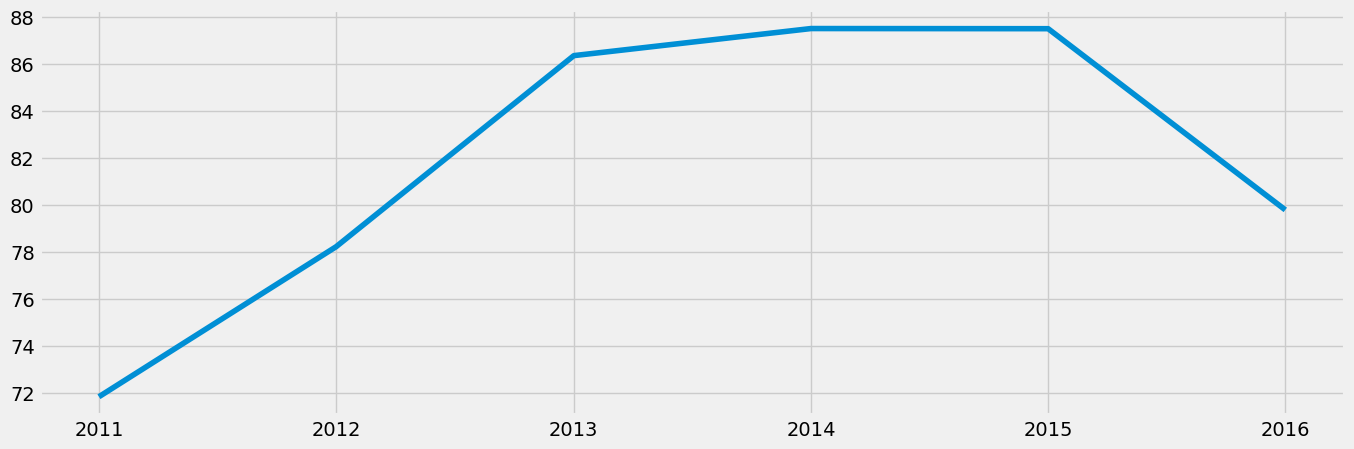

In [17]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_times_USA)

Due to the small number of years available in the data, the line chart for the average world rankings of American Universities seems rather simplistic. There is an overall general increase in world rankings for America universities, with a very slight decrease from 2014 to 2015 and a decrease from 2015 to 2016. The USA is still consistent and has the largest amount of top universities out of all countries by a large margin. 

## 4. Decompose the data's components

In [18]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_times_USA, model='additive')

In [19]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

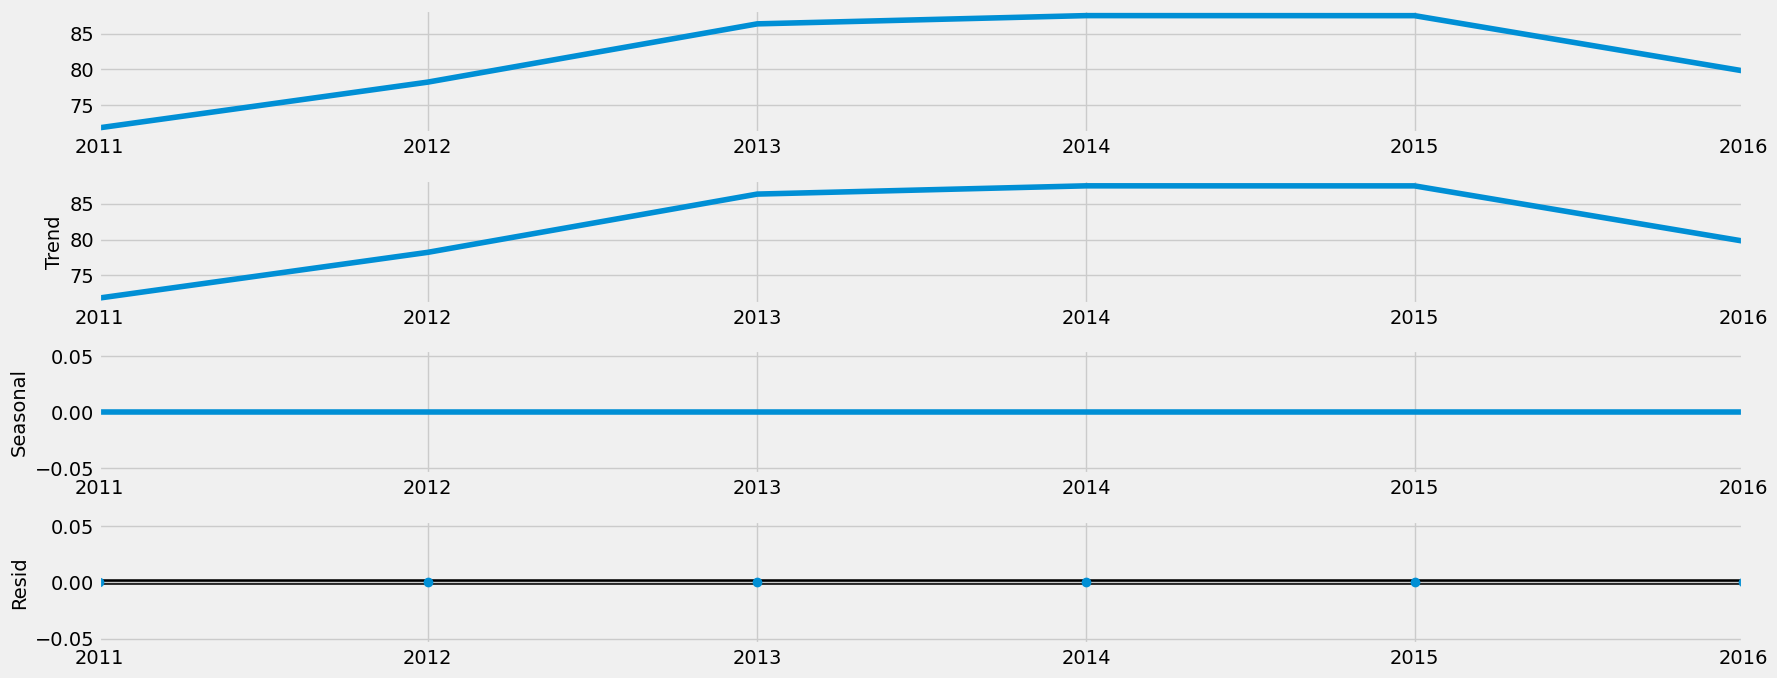

In [20]:
# Plot the separate components

decomposition.plot()
plt.show()

There is an overall positive trend even though it looks like more of a jump in the graph. There appears to be no seasonality and no residual noise. The data looks to be non-stationary due to the overall positive trend but may not be reliable due to the lack of time data points. In addition, while the trend looks significant, the scale of the increase is rather small (the range of the graph is only 10). 

## 5. Conduct a Dickey-Fuller Test to check for stationarity. Interpret the results and reference your null hypothesis.

In [21]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_times_USA['world_rank_Times'])

Dickey-Fuller Stationarity test:
Test Statistic                -2.122433
p-value                        0.235590
Number of Lags Used            0.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64


Test Statistic: -2.122

5% Critical Value: -3.929

Because the Test Statistic is greater than the Critical Value, the null hypothesis cannot be rejected. There is a unit root in the data and the data is non-stationary. 

## 6. Conduct a round of differencing on the data and repeat the check.

In [22]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

df_times_USA_diff = df_times_USA - df_times_USA.shift(1)

In [23]:
# Remove the missing values in order to run the Dickey-Fuller test. 

df_times_USA_diff.dropna(inplace = True)

In [24]:
df_times_USA_diff.head()

,world_rank_Times
datetime,
2012-01-01,6.379444
2013-01-01,8.128596
2014-01-01,1.151230
2015-01-01,-0.006494
2016-01-01,-7.706349


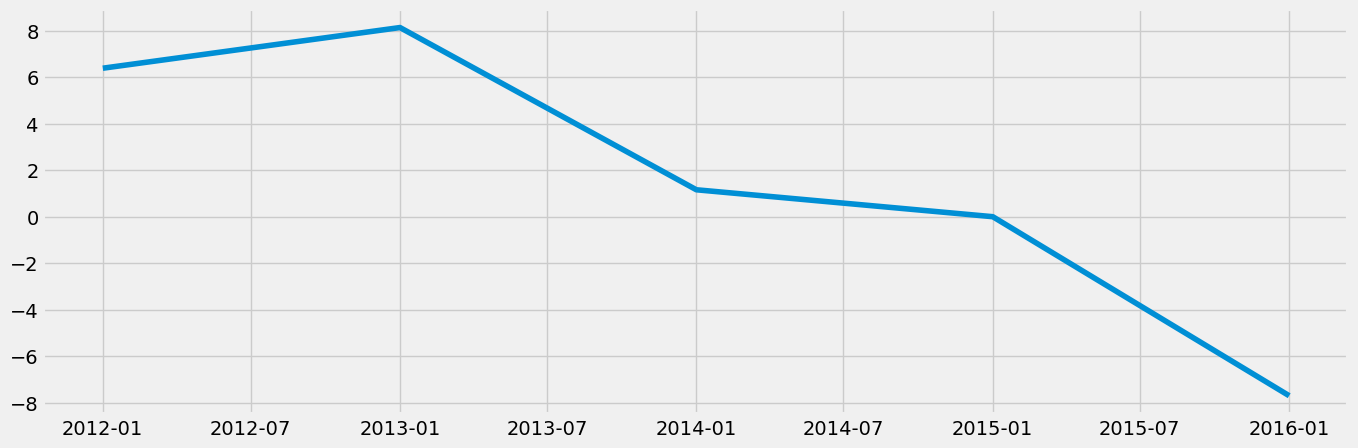

In [25]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_times_USA_diff)

In [26]:
dickey_fuller(df_times_USA_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 0.218510
p-value                        0.973281
Number of Lags Used            0.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


Test Statistic: 0.219

5% Critical Value: -4.474

Once again, because the Test Statistic is greater than the Critical Value, the null hypothesis cannot be rejected. There is a unit root in the data and the data is non-stationary. 

## 7. Repeat the differencing a second time. 

In [27]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

df_times_USA_diff_round2 = df_times_USA_diff - df_times_USA_diff.shift(1)

In [28]:
# Remove the missing values in order to run the Dickey-Fuller test. 

df_times_USA_diff_round2.dropna(inplace = True)

In [29]:
df_times_USA_diff_round2.head()

,world_rank_Times
datetime,
2013-01-01,1.749152
2014-01-01,-6.977366
2015-01-01,-1.157724
2016-01-01,-7.699856


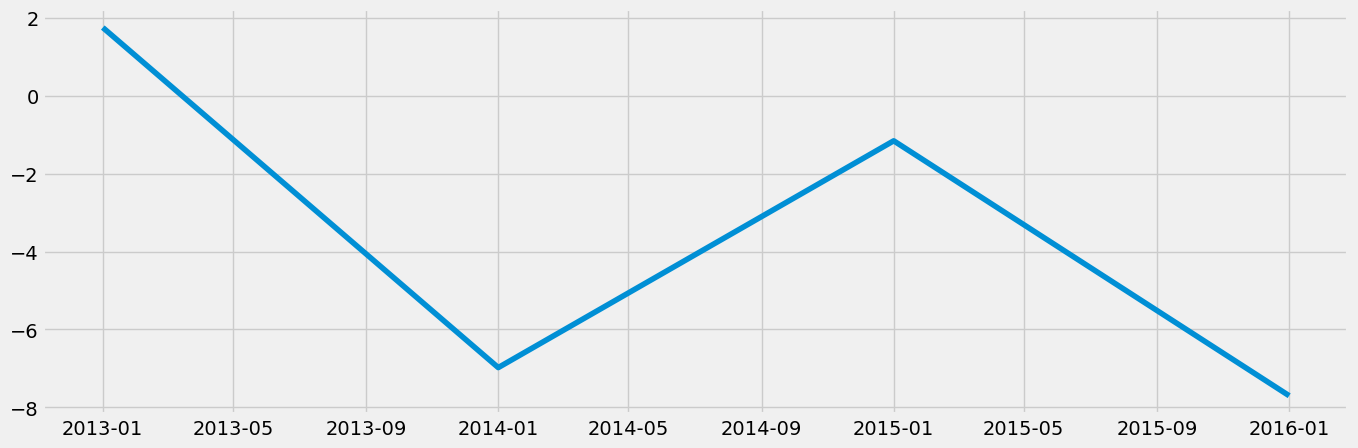

In [30]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_times_USA_diff_round2)

In [26]:
dickey_fuller(df_times_USA_diff_round2)

Dickey-Fuller Stationarity test:
Test Statistic                 0.218510
p-value                        0.973281
Number of Lags Used            0.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


Test Statistic: 0.219

5% Critical Value: -4.474

Once again, because the Test Statistic is greater than the Critical Value, the null hypothesis cannot be rejected. There is a unit root in the data and the data is non-stationary. 

## 8. Check out the data's autocorrelations

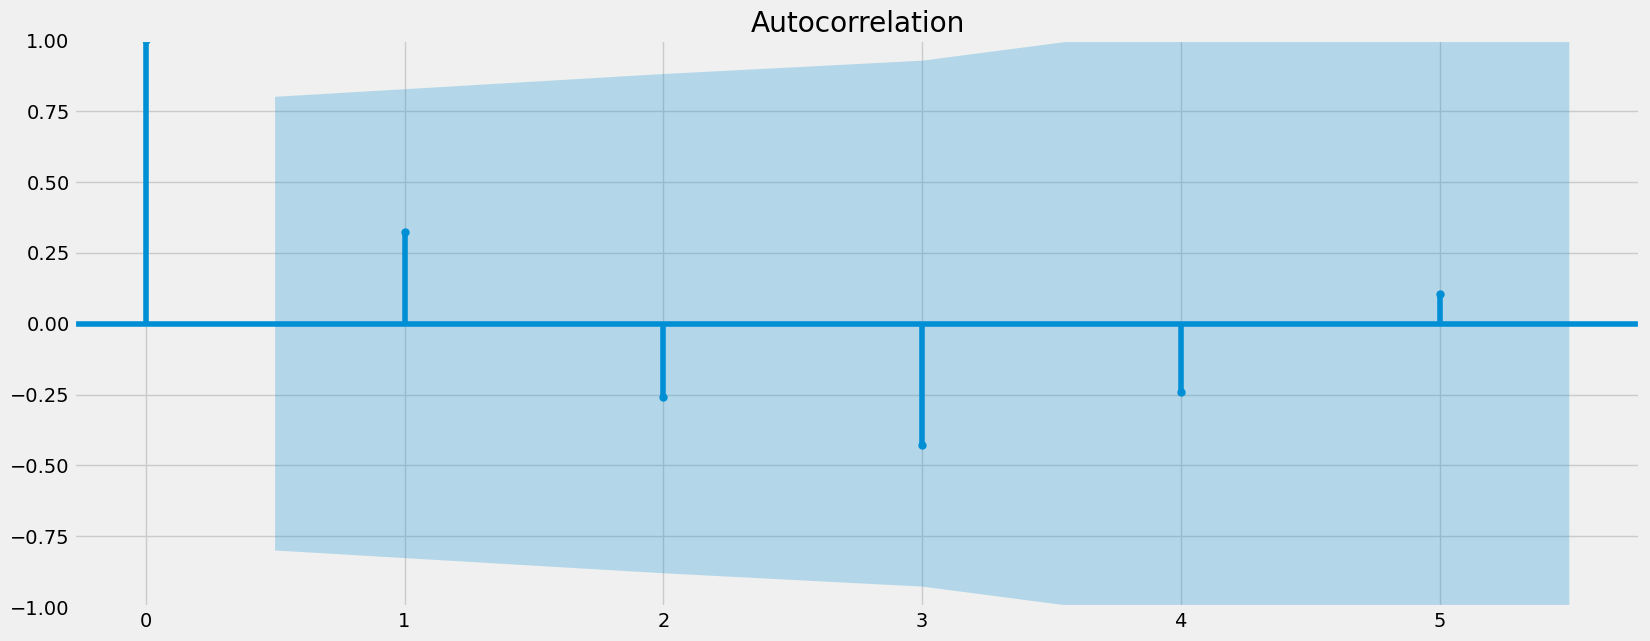

In [31]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_times_USA)
plt.show()

There is only one line that it out of bounds of the confidence interval, which indicates that the data is not correlated with each other and is stationary. However, this is likely due to the fact that there are only 6 datapoints, so this autocorrelation graph may not be very accurate. 

## 9. Final steps (saving files)

In [32]:
# Export the aggregate dataframe of world rankings since it could possibly be useful in the future

df_times_timerank.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'times_top200_timecountrygrouped.csv'))